In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/vietnamese-sentences/sentences.csv")  # thay tên file cụ thể nếu khác

sample_pairs = df.sample(5, random_state=42)
print("🔹 5 cặp câu bất kỳ (không dấu | có dấu):\n")
for idx, row in sample_pairs.iterrows():
    print(f"❌ Không dấu: {row['sentence_without_diacritics']}")
    print(f"✅ Có dấu:    {row['sentence_with_diacritics']}")
    print()

total_sentences = len(df)
print(f"Tổng số câu: {total_sentences:,}")

train_size = int(total_sentences * 0.8)
val_size = int(total_sentences * 0.1)
test_size = total_sentences - train_size - val_size

print(f"\n🔹 Chia tập dữ liệu:")
print(f"🟢 Train: {train_size:,} câu")
print(f"🟡 Val:   {val_size:,} câu")
print(f"🔴 Test:  {test_size:,} câu")

🔹 5 cặp câu bất kỳ (không dấu | có dấu):

❌ Không dấu: phu nu can biet rang kinh nguyet la ket qua cua nhung tac dong noi tiet than kinh cam xuc nen rat de thay doi theo tung chu ky cung nhu theo tuoi tac va nhung su co trong cuoc doi
✅ Có dấu:    phụ nữ cần biết rằng kinh nguyệt là kết quả của những tác động nội tiết thần kinh cảm xúc nên rất dễ thay đổi theo từng chu kỳ cũng như theo tuổi tác và những sự cố trong cuộc đời

❌ Không dấu: doi hinh cua sky 442 thu mon warner fulham hau ve campo bolton de zeeuw wigan perry charlton del horno chelsea tien ve shaun wright phillips chelsea malbranque fulham murphy charlton konchesky west ham tien dao baros aston villa heskey birmingham click vao de xem ro hon doi hinh cua espn 352 thu mon sorensen aston villa hau ve de zeeuw wigan chris perry charlton del horno chelsea tien ve pennant birmingham murphy charlton reyna man city manbranque fulham heskey birmingham tien dao rooney mu baros aston villa click vao de xem ro hon
✅ Có dấu:    đội hìn

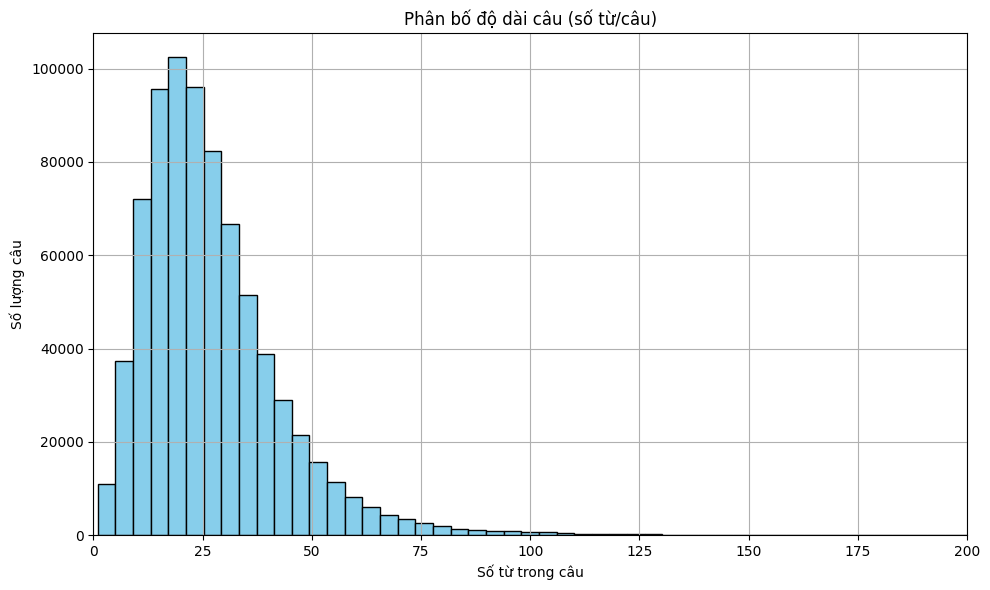

In [12]:
import matplotlib.pyplot as plt

# Phân bố độ dài câu (theo số từ)
df['sentence_length'] = df['sentence_without_diacritics'].apply(lambda s: len(str(s).split()))

# Vẽ biểu đồ phân bố độ dài câu
plt.figure(figsize=(10,6))
plt.hist(df['sentence_length'], bins= 300, color='skyblue', edgecolor='black')
plt.title("Phân bố độ dài câu (số từ/câu)")
plt.xlabel("Số từ trong câu")
plt.ylabel("Số lượng câu")
plt.xlim(0, 200)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/3429049654.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


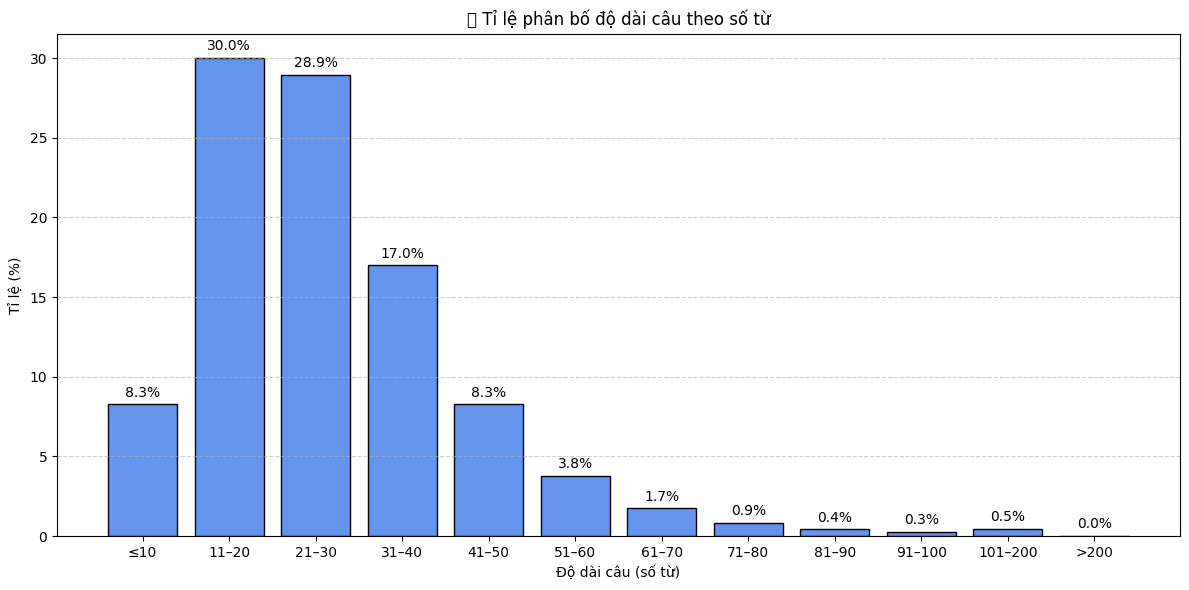

In [18]:
# Nếu chưa có cột sentence_length
df['sentence_length'] = df['sentence_without_diacritics'].apply(lambda s: len(str(s).split()))

# Định nghĩa lại các khoảng chi tiết hơn từ 50 đến 100
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 1000]
labels = [
    '≤10', '11–20', '21–30', '31–40', '41–50',
    '51–60', '61–70', '71–80', '81–90', '91–100',
    '101–200', '>200'
]

# Gán mỗi câu vào khoảng
df['length_bin'] = pd.cut(df['sentence_length'], bins=bins, labels=labels, right=True)

# Đếm số lượng và tính phần trăm
length_counts = df['length_bin'].value_counts().sort_index()
length_percent = (length_counts / len(df)) * 100

# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(length_percent.index.astype(str), length_percent.values, color='cornflowerblue', edgecolor='black')
plt.title("📊 Tỉ lệ phân bố độ dài câu theo số từ")
plt.xlabel("Độ dài câu (số từ)")
plt.ylabel("Tỉ lệ (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ghi nhãn phần trăm trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
all_text = " ".join(df['sentence_without_diacritics'].astype(str))

# Tách từ
all_words = all_text.split()

total_words = len(all_words)
total_chars = sum(len(word) for word in all_words)

average_word_length = total_chars / total_words

print(f"📏 Trung bình độ dài từ của toàn bộ tập: {average_word_length:.2f} ký tự/từ")

📏 Trung bình độ dài từ của toàn bộ tập: 3.44 ký tự/từ


In [17]:
df['sentence_length'] = df['sentence_without_diacritics'].apply(lambda s: len(str(s).split()))

average_sentence_length = df['sentence_length'].mean()

print(f"🧮 Trung bình số từ mỗi câu: {average_sentence_length:.2f} từ/câu")

🧮 Trung bình số từ mỗi câu: 27.43 từ/câu
